In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('C:/Users/kartik/Desktop/Walmart.csv')

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [18]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [19]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [20]:
df.shape

(6435, 8)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int64  
 8   Week          6435 non-null   int64  
 9   Month         6435 non-null   int64  
 10  Year          6435 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 553.1 KB


In [23]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Weekly_Sales: 6435
Holiday_Flag: 2
Temperature: 3528
Fuel_Price: 892
CPI: 2145
Unemployment: 349
Day: 7
Week: 52
Month: 12
Year: 3


In [24]:
# Date exploration
plt.pie(df['Year'].value_count().values,labels= df['Year'].value_count().index,autopct='%1.2f%%',shadow=True,colors=['gold','red',"silver"]) 
plt.title('Annual Sales')
plt.show()

AttributeError: 'Series' object has no attribute 'value_count'

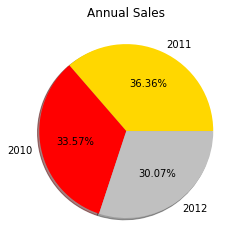

In [25]:
plt.pie(df['Year'].value_counts().values,labels =df['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['gold','red',"silver"])
plt.title('Annual Sales')
plt.show()

In [26]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year'],
      dtype='object')

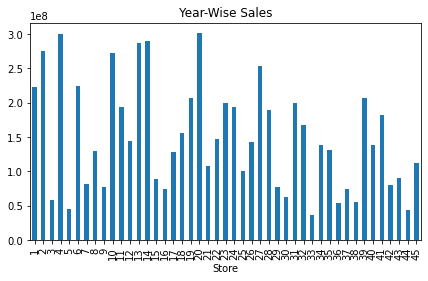

In [27]:
plt.figure(figsize=(7,4))
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()
#Store number 4 and 20 have highest weekly sales.


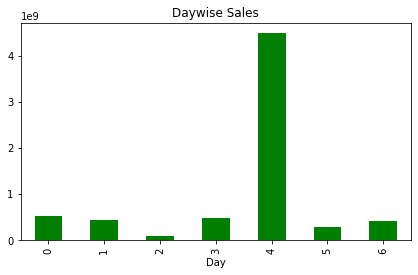

In [28]:
plt.figure(figsize=(7,4))

df.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Daywise Sales')

plt.show()

In [ ]:
#Thursday has maximum sales in a weeek.

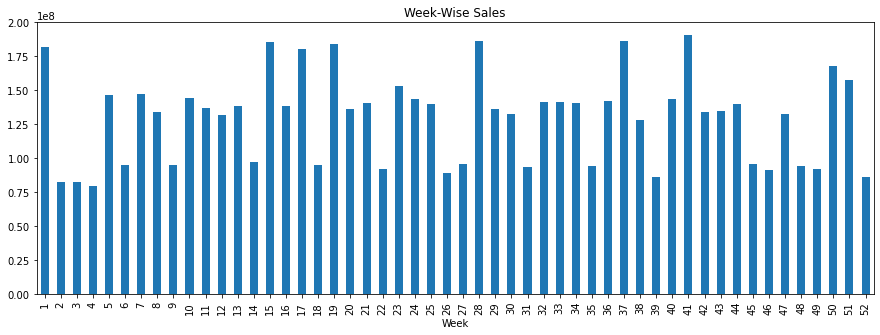

In [29]:
plt.figure(figsize=(15,5))
df.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title ('Week-Wise Sales')
plt.show()

In [ ]:
#41st week has highest sale in a year

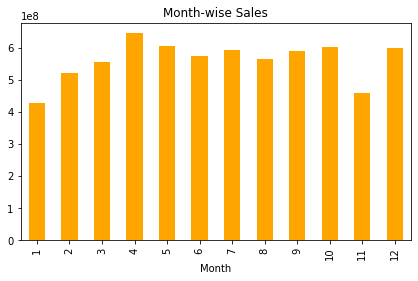

In [30]:
plt.figure(figsize=(7,4))

df.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='Orange')
plt.title('Month-wise Sales')

plt.show()

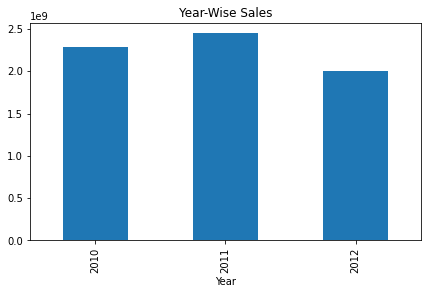

In [31]:
plt.figure(figsize=(7,4))

df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

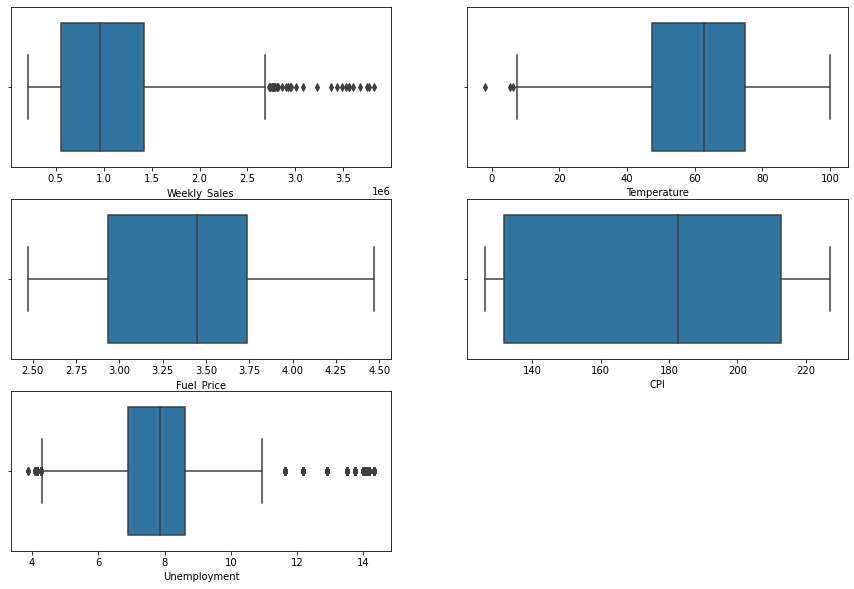

In [32]:
#checking outliers with the boxplot
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [33]:

def outlier_removal (df):
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        Q1= df[i].quantile(0.25)
        Q3= df[i].quantile(0.75)
        IQR =Q3-Q1
        Uper= Q3+1.5*IQR 
        Lower= Q1-1.5*IQR
        df[i] = np.where(df[i]>Uper,Uper,np.where(df[i]<Lower,Lower,df[i]))
outlier_removal(df)

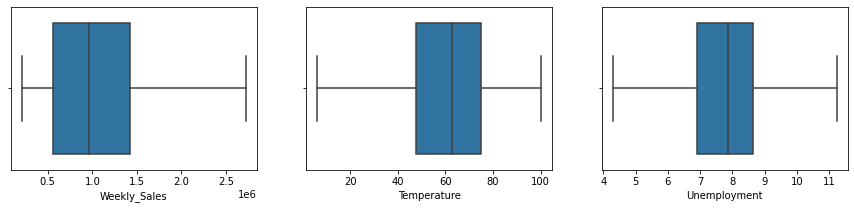

In [34]:
n = 1
cols =["Weekly_Sales","Temperature","Unemployment"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [35]:
df2=df.copy()

In [36]:
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [37]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df2['Day'] = df2['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df2['Month']= df2['Month'].map(months)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,18,May,2010


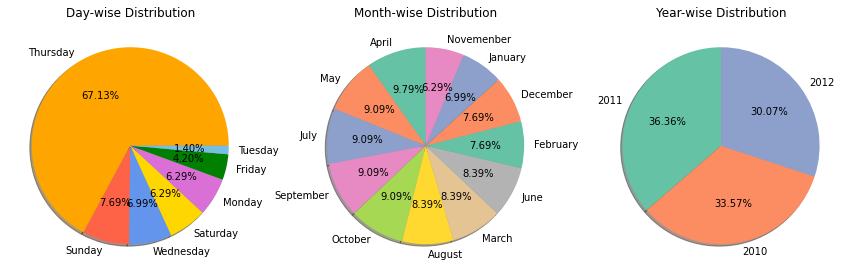

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.pie(df2['Day'].value_counts().values, labels =df2['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=["Orange",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]) 
plt.title('Day-wise Distribution')
plt.grid()
plt.subplot(1, 3, 2)
plt.pie(df2['Month'].value_counts().values, labels =df2['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()
plt.subplot(1, 3, 3)
df3 = df2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df2['Year'].value_counts().values, labels =df2['Year'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)  
plt.title('Year-wise Distribution')
plt.grid()
plt.show()


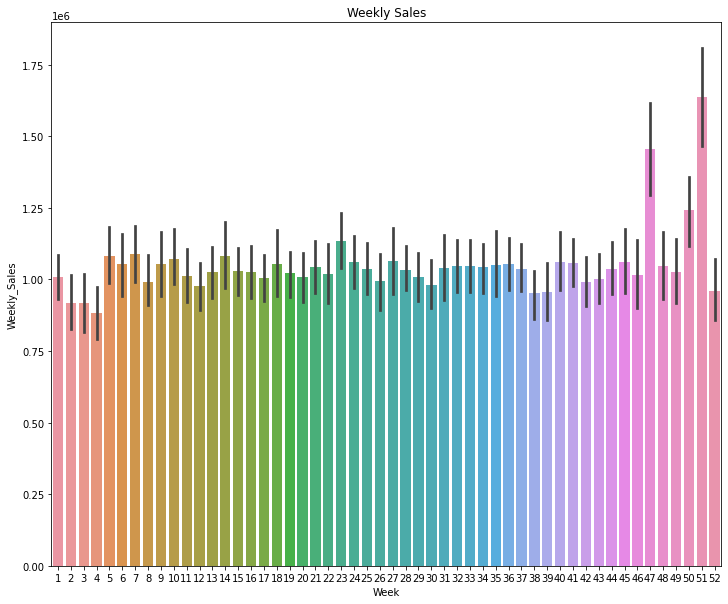

In [39]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='Week', y='Weekly_Sales')
plt.title('Weekly Sales')
plt.show()

In [ ]:
#47th and 51st week has maximum weekly sales. Week 4th has minimum sales.

<Figure size 1080x864 with 0 Axes>

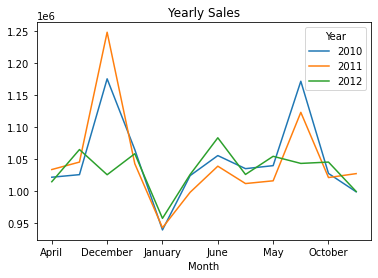

In [40]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df2, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [41]:
print('Minimum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().min())
print('Maximum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().max())

Minimum Sales in the Walmart:  37160221.960000016
Maximum Sales in the Walmart:  299066335.25750005


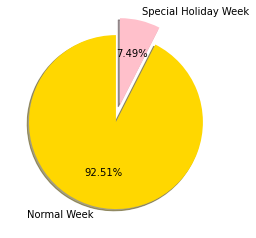

In [42]:
df3 = df2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels= ['Normal Week','Special Holiday Week'],
autopct='%1.2f%%',startangle=90,explode=[0,0.2],shadow=True,colors=['gold','pink'])
plt.show()

In [43]:
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,18,May,2010


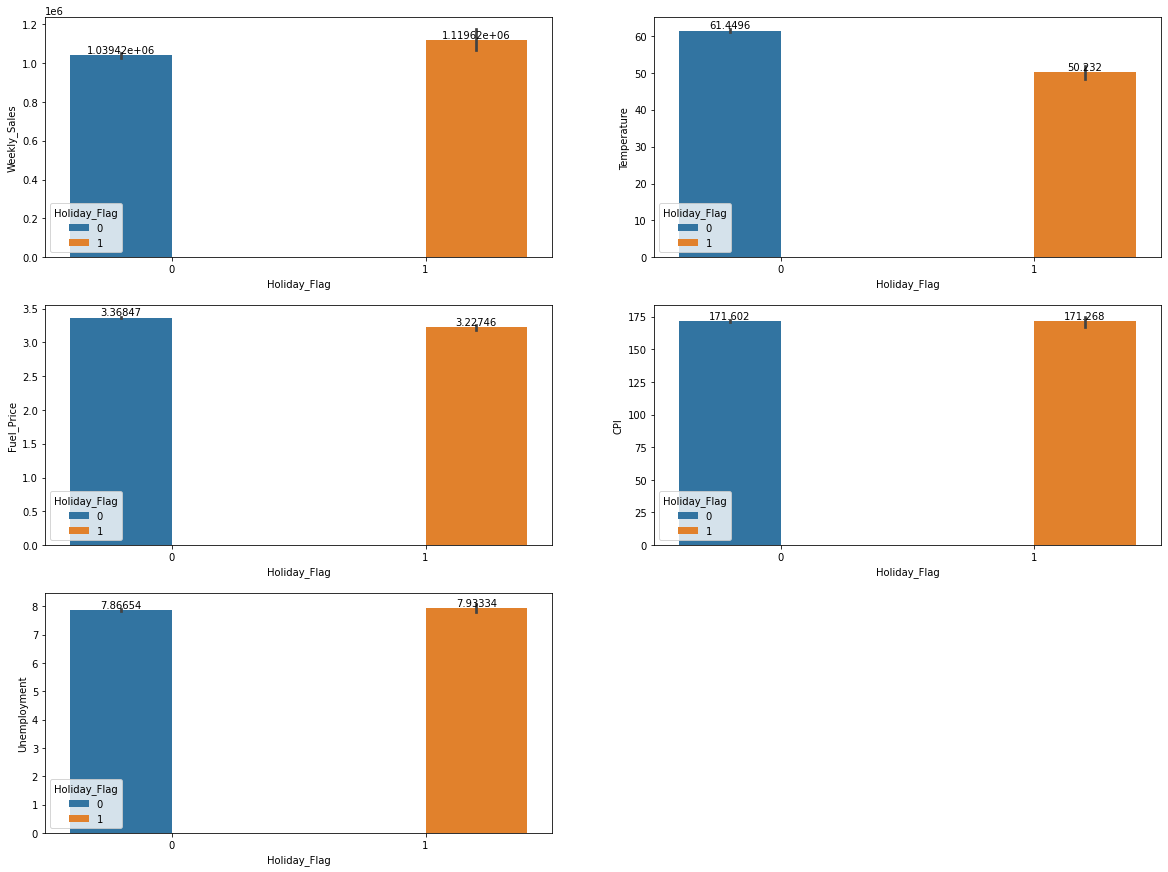

In [44]:
from numpy import mean 
t=1 
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
    if t<=5:
        plt.subplot(3,2,t)
        ax= sns.barplot(data = df2, x= "Holiday_Flag",y=i, hue= df.Holiday_Flag,estimator= mean);
        t+=1
        
        for i in ax.containers:
            ax.bar_label(i,)

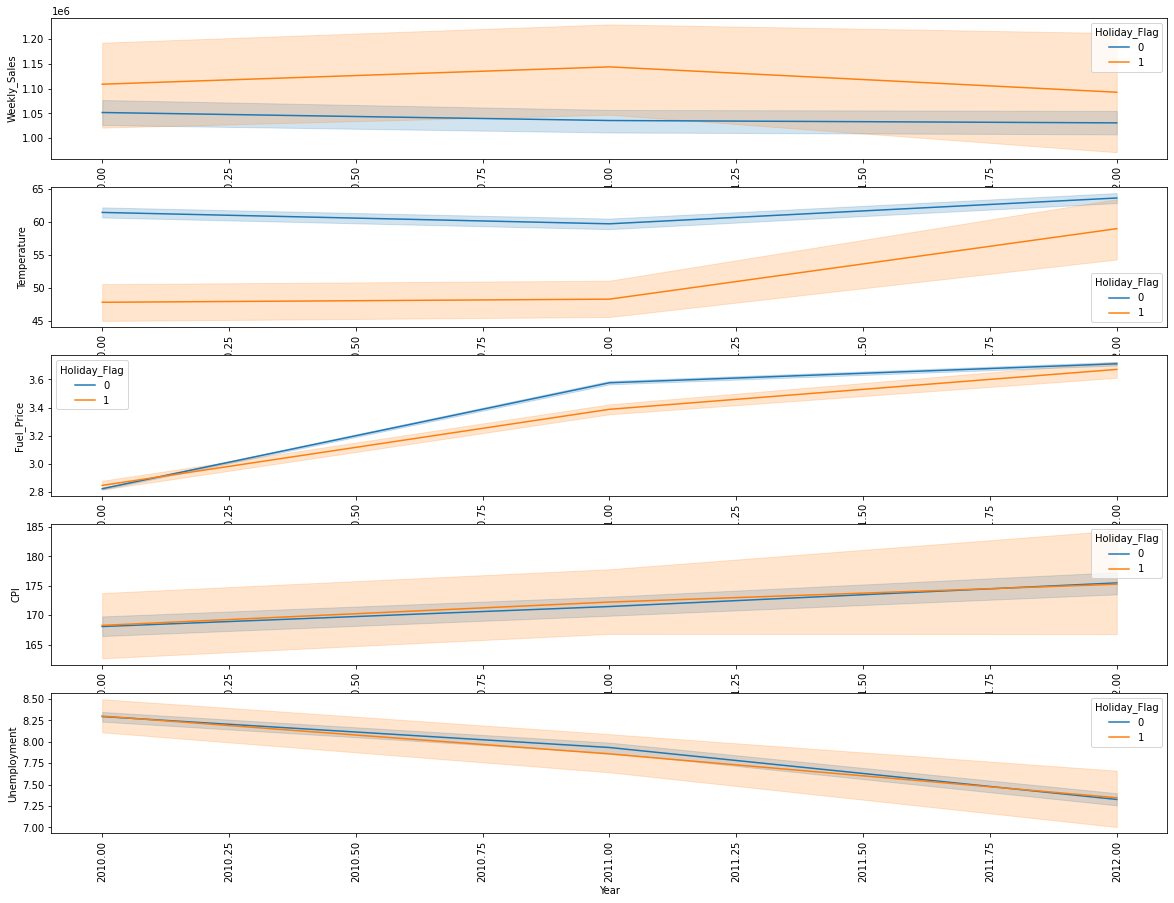

In [45]:
n = 1
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if n<=5:
            plt.subplot(5,1,n)
            ax = sns.lineplot(data = df2 , x = "Year" ,y = i  , hue = df.Holiday_Flag );
            plt.xticks(rotation = 90)
            n+=1

KeyboardInterrupt: 

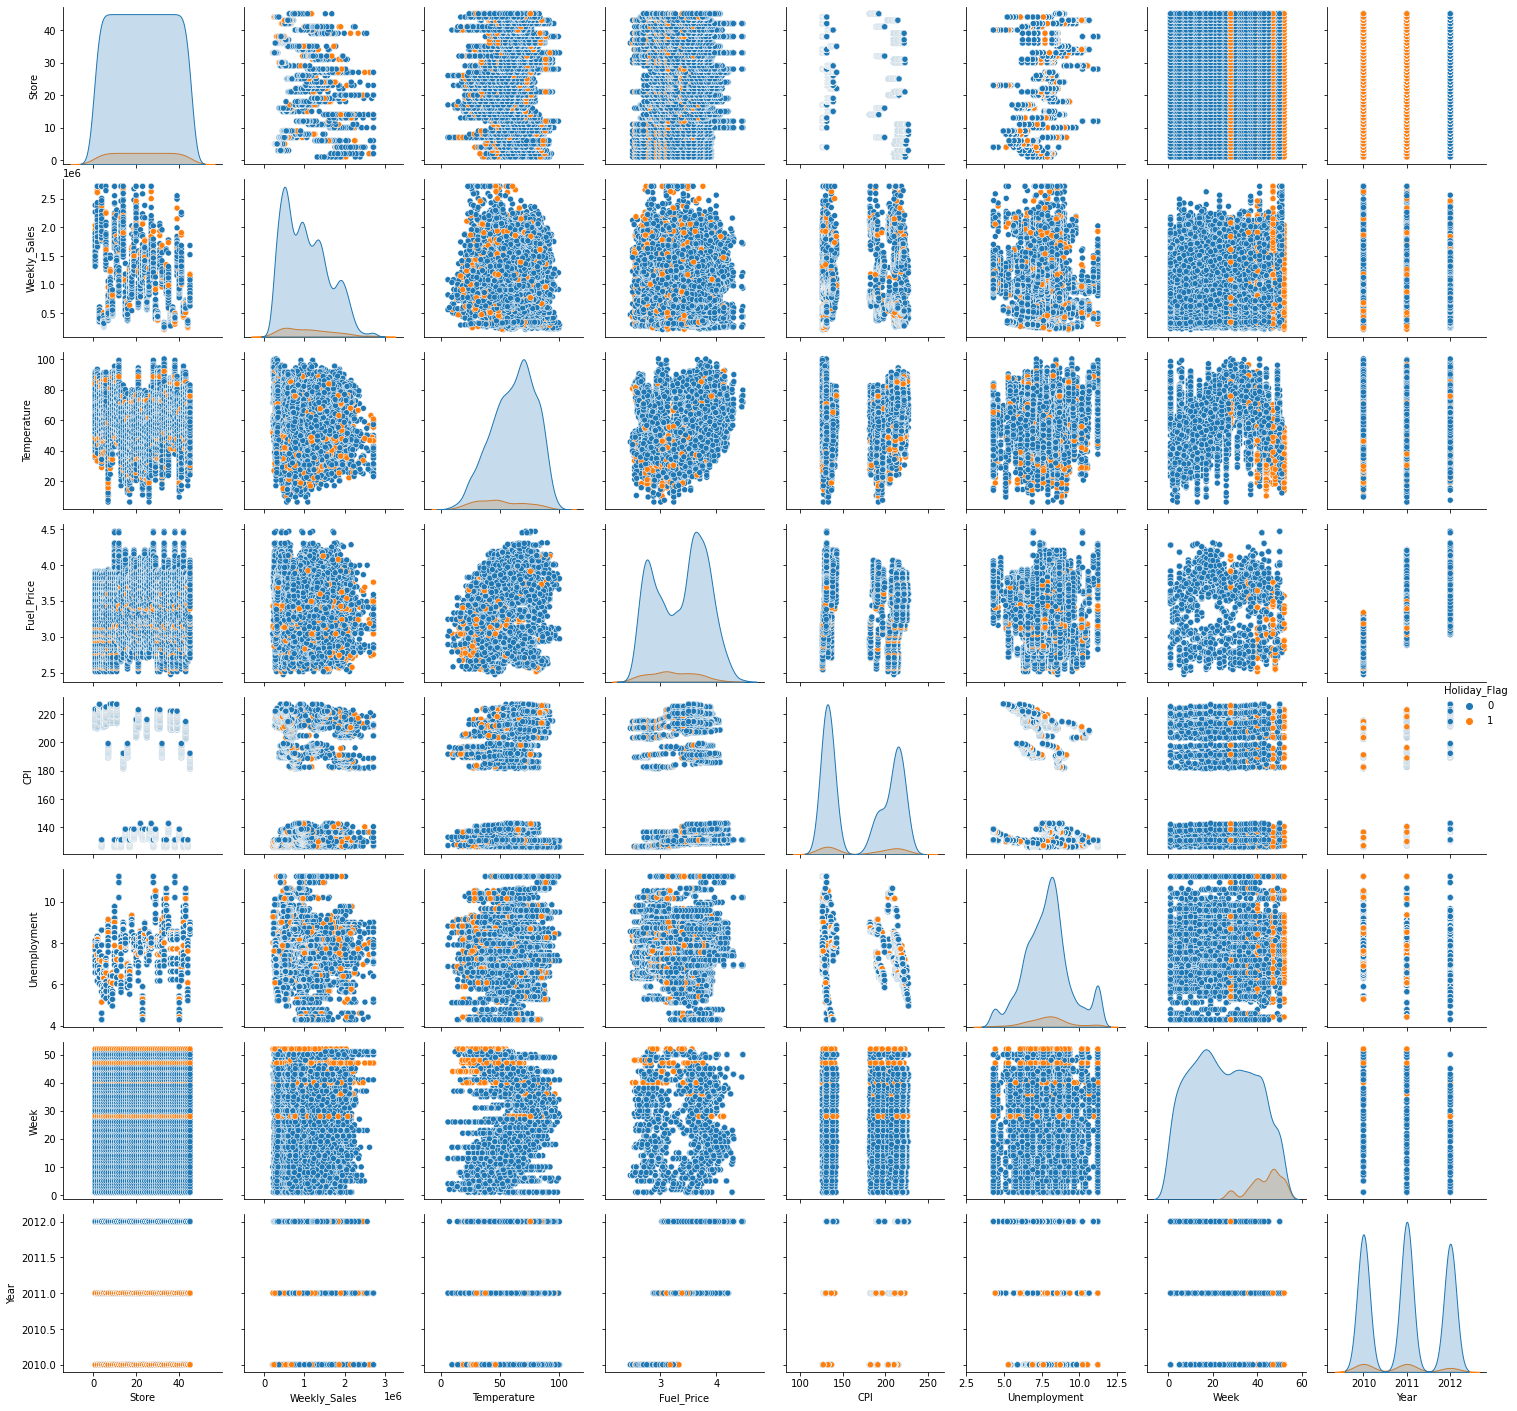

In [46]:
sns.pairplot(df2 , hue = "Holiday_Flag" );
plt.title("Distribution and relation of all attributes on Holiday and Normal Week");

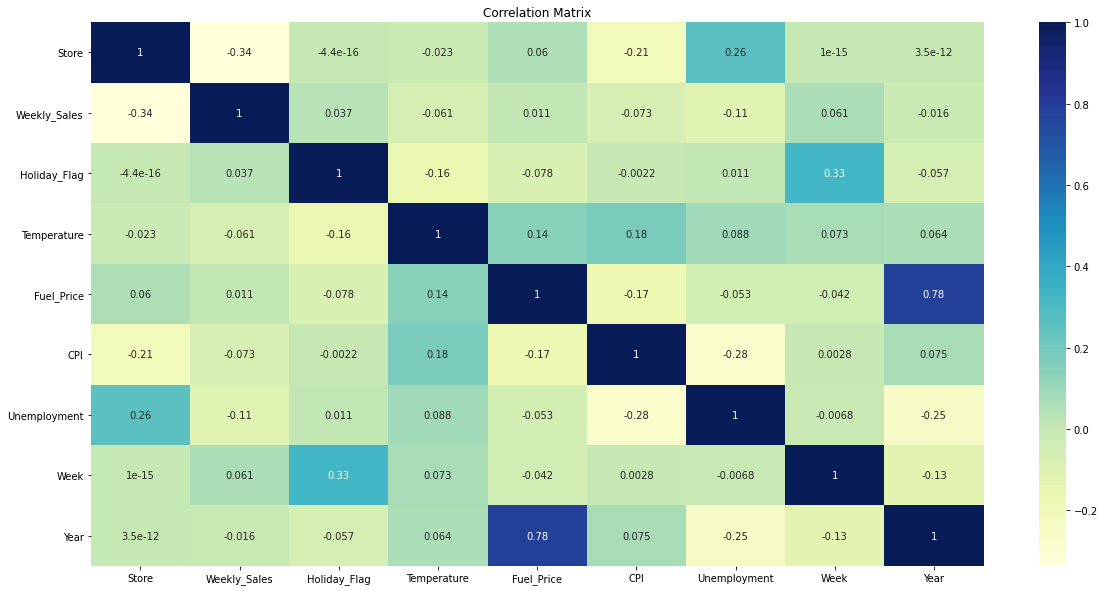

In [47]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot=True,cmap ="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

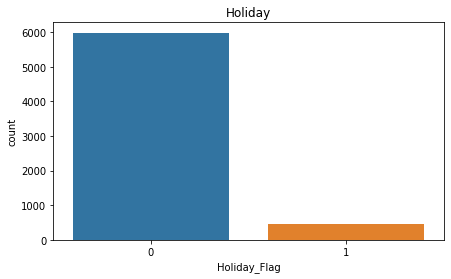

In [48]:
plt.figure(figsize=(7,4))

sns.countplot(x= df2.Holiday_Flag)
plt.title('Holiday')

plt.show()

In [49]:
df2.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

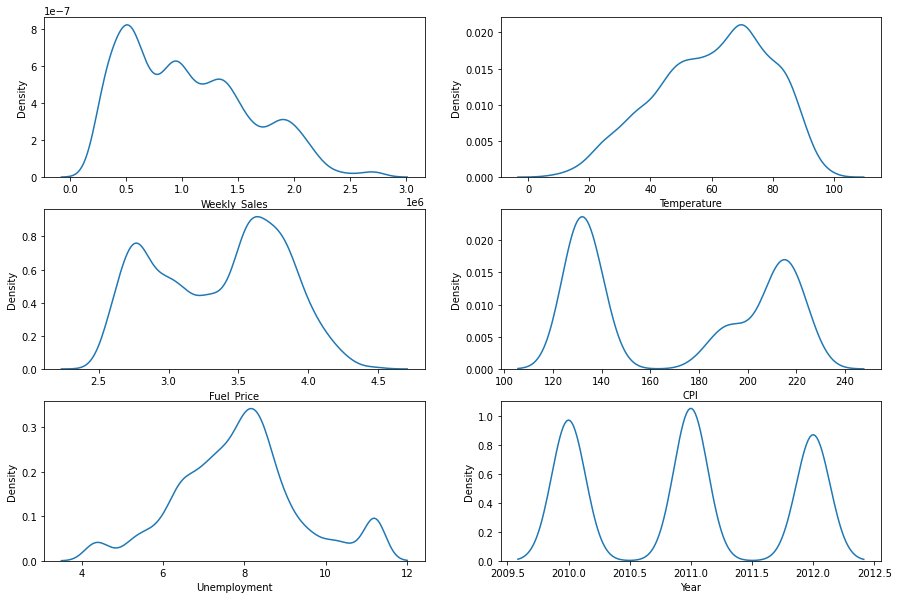

In [50]:
n = 1
plt.figure(figsize=(15,10))
for i in ['Weekly_Sales','Temperature', 'Fuel_Price','CPI', 'Unemployment','Year']:
        if n<=6:
            plt.subplot(3,2,n);
            n+=1
            sns.kdeplot(x = df2[i])
            plt.xlabel(i)

Model Building




In [51]:
x = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

In [52]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [55]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [56]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [57]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 264738381082.9739
MAE: 431432.7511108542
R2 : 15.25 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 264737375720.92532
MAE: 431432.0331513191
R2 : 15.25 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 264721899729.84332
MAE: 431423.5915561211
R2 : 15.25 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 272154672488.92435
MAE: 441171.0722675719
R2 : 12.87 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 14680500500.084356
MAE: 68393.80705844988
R2 : 95.3 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 25678983829.948086
MAE: 89637.10877428128
R2 : 91.78 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MS

[None, None, None, None, None, None, None, None]